In [74]:
#Importing libraries
import pandas as pd
import json
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt 
from scipy.linalg import svd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

%matplotlib inline

In [75]:
#importing watch-later.json file
with open('watch-later.json','r',encoding="utf8") as fout:
       watch_later = json.load(fout)
type(watch_later)

list

In [76]:
# first video in my watch_later playlist
watch_later[0]

{'contentDetails': {'videoId': 'oOPWnVqtPko',
  'videoPublishedAt': '2015-12-11T23:33:17.000Z'},
 'etag': '"wdgS91PsEbtTfi20GmzFuZzYg2s/WxoXz4KNUZx7c9Ktq_KrjXhcIuc"',
 'id': 'V0w5ems5ZVdyQkU4NWVlV0JYRjRRR0Z3LjI4OUY0QTQ2REYwQTMwRDI=',
 'kind': 'youtube#playlistItem',
 'snippet': {'channelId': 'UC9zk9eWrBE85eeWBXF4QGFw',
  'channelTitle': 'Swapnil Baad',
  'description': "its finally here!! Don't worry guys I do finally realise that there is a tournament. I just couldn't help but get this bad boy straight away!\n\nJurassic World Group :https://www.facebook.com/groups/755661411216874\n\n❤❤❤ For Exclusive Updates you can find them all here ❤❤❤\n❤ Facebook: http://on.fb.me/1CSf5Yd\n❤ Instagram: http://bit.ly/1LE000q\n❤ Twitter: http://bit.ly/16adMa1\n❤ Twitch: www.twitch.tv/agamingbeaver\n\nBattle Chart and Statistics\nhttp://battlecalculator.com/jurassic-world-creature-statistics/\n\nSo what is there to say about it? Well it appears to be very similar to jurassic park builder but has bette

In [77]:
#extracting titles and dexcription text from the lists
titles = [v['snippet']['title'] for v in watch_later]
descriptions = [v['snippet']['description'] for v in watch_later]

In [78]:
#data visualization for representing text data in which the size of each word indicates its frequency or importance.
from wordcloud import WordCloud

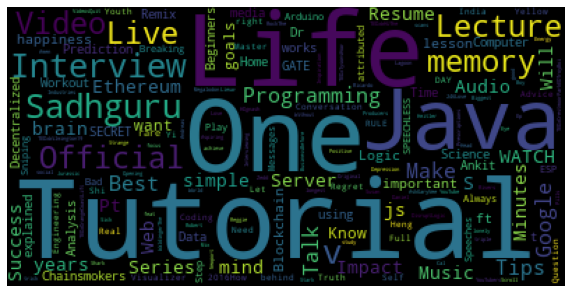

In [79]:
wc = WordCloud().generate("".join(titles))
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')

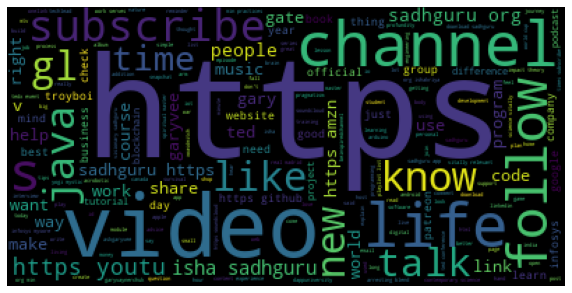

In [80]:
#filtering stop-words

stopwords = ['http', 'www', 'com', 'facebook', 'youtube' , 'bit' , 'ly' , 'goo' , 'watch' , 'suggest' , 'twitter' , 'instagram' ]
stopwords +=  list(ENGLISH_STOP_WORDS)
desc = ' '.join(descriptions).lower()

wc= WordCloud(stopwords=stopwords, normalize_plurals=True).generate(desc)
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')

In [81]:
#transforming text into a meaningful representation of numbers 
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(stop_words=stopwords)


X = vect.fit_transform(descriptions)

In [82]:
X.shape

(134, 4698)

In [83]:
U, S, V = svd(X.todense(), full_matrices=False)

In [84]:
num_top_words = 5
vocab = vect.get_feature_names()

def show_topics(a , n_words=5):
    top_words = lambda t: [vocab[i] for i in np.argsort(t) [:-n_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

C:\Users\swapn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [85]:
#show top 20 topics*
show_topics(V[:20])

['1800 infosysmysorecampus infosysmysoretraining bpfy hostel',
 'https garyvee java gary video',
 'https dappuniversity java gl github',
 'tedx ted organized self events',
 'garyvee https gary dappuniversity garyvaynerchuk',
 'gl google interview techlead https',
 'gl https beinspiredchannel google follow',
 'beinspiredchannel xwasdmitch https java music',
 'tedx organized self events beinspiredchannel',
 'xwasdmitch 2020 pc gaming official',
 'gl google engineering gle hxdzlf',
 'impact know theory geographic tom',
 'impact theory tom brain bilyeu',
 'know illenium amzn smarturl https',
 'gl know illenium beinspiredchannel ascend',
 'youtu troyboi java trap resume',
 'book amzn lesson resume video',
 'https youtu troyboi lesson thenewboston',
 'news illenium vice world vicenews',
 'illenium ascend arms pposed died']

In [86]:
from sklearn.decomposition import TruncatedSVD

In [87]:
# number of components = 2 for plotting on X-Y axis
tsne = TruncatedSVD(n_components=2)
x_red = tsne.fit_transform(X.todense())

C:\Users\swapn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


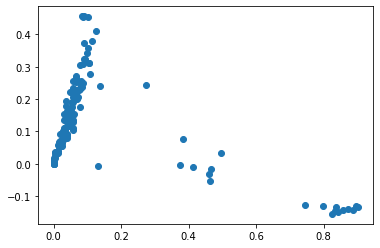

In [88]:
plt.scatter(*x_red.T)

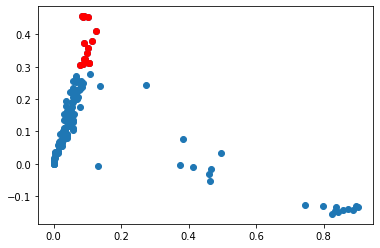

In [89]:
#Creating a set of outliers
outliers = np.arange(x_red.shape[0])[x_red[:, 1] > 0.3]
plt.scatter(*x_red.T)
plt.scatter(*x_red[outliers, :].T, c="r")

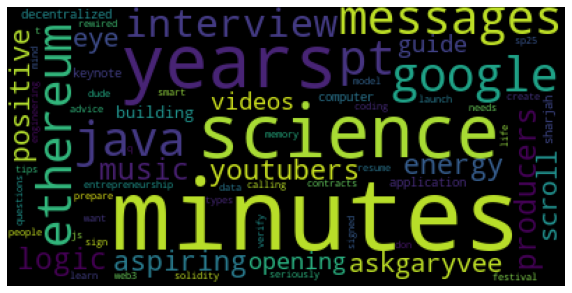

In [90]:
# Finding out keywords for outliers
outliers = [titles[i] for i in outliers]
wc = WordCloud(stopwords = stopwords , normalize_plurals = True).generate(' '.join(outliers).lower())
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')

<b> Thus, from above I need to filter out videos which above keywords and prioritize the videos in my watch-later playlist. <b>